In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import nltk
from nltk.tokenize import  word_tokenize
import numpy as np # linear algebra
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import scipy.stats as stats
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
nltk.download('punkt')
pd.set_option('display.max_rows', None)

[nltk_data] Downloading package punkt to /home/fran/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
#data
#everyday from 2017-11-09 to 2024-04-15 
bit = pd.read_csv('./cryptoData/bitcoin_2013-12-28_2024-04-24.csv')
data = pd.read_csv('./tweetData/bitcoin_tweets.csv')
NEmoWords = pd.read_csv('./wordData/negative-words.csv', encoding='latin-1')
PEmoWords = pd.read_csv('./wordData/positive-words.csv', encoding='latin-1')
#bit

Notes from viewing data:
1. The price always falls after a peak
        

Notes from collecting information:
1. I might need to go on social media platforms like youtube, twitter,
     and reddit to get more accurate reactions and buys from people
2. I've done that, so now i need to tokenize the tweets
3. The words said in the tweets don't have corrilation, it would be the phrases and such

Notes from viewing bitcoin data:
1. I should start looking at the high and low
2. nvm I should have started at the closeing values because its the outcome of the day

In [5]:
enOnly = data.loc[data['lang'] == 'en']
enOnly['created_at'] = pd.to_datetime(enOnly['created_at'])
enOnly['date'] = enOnly['created_at'].dt.date

/tmp/ipykernel_7803/1294036717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enOnly['created_at'] = pd.to_datetime(enOnly['created_at'])
/tmp/ipykernel_7803/1294036717.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enOnly['date'] = enOnly['created_at'].dt.date


In [ ]:
positive_words = set(PEmoWords['Positive Words'])
negative_words = set(NEmoWords['Negative Words'])

def tokenize_tweet(tweet):
    return word_tokenize(tweet.lower())

def detect_sentiment_words(tokens):
    positive_count = sum(1 for word in tokens if word in positive_words)
    negative_count = sum(1 for word in tokens if word in negative_words)
    return positive_count, negative_count

def process_tweets(tweets):
    data = []
    for tweet in tweets:
        tokens = tokenize_tweet(tweet)
        pos_count, neg_count = detect_sentiment_words(tokens)
        data.append({'tweet': tweet, 'positive_count': pos_count, 'negative_count': neg_count})
    return pd.DataFrame(data)

test = process_tweets(enOnly['text'])

In [ ]:
test = test.assign(date=enOnly['date'])
test_data = test.dropna()

general_td = test_data.groupby('date').sum().reset_index()
general_td

,date,tweet,positive_count,negative_count
0,2022-02-28,I believe It is a wonderful project. The proje...,7329,2518
1,2022-03-01,$BTC did you know stocktwits removed any menti...,7322,2514
2,2022-03-02,RT @FarcanaOfficial: 🤜🤛Welcome our New Partner...,8535,2067
3,2022-03-03,"@PaikCapital BTC, ETH, SOLBitcoin Rally Cools ...",8452,2179
4,2022-03-04,#GHC is definetly the gem of 2022. Buy now or ...,8534,2615
...,...,...,...,...
88,2022-05-27,RT @0xBreakdown: 🎁 @THaughtyMummies #NFTGIVEAW...,8563,3037
89,2022-05-28,RT @WhatBitcoinDid: “#Bitcoin’s network diffic...,7746,3272
90,2022-05-29,RT @AirdropStario: 💧 NFT Drops Radar Airdrop 💧...,6889,2508
91,2022-05-30,RT @Win_USD: $$ WinUSD Giveaway $$\n $...,7856,2558


In [ ]:
gtd = general_td[:92]
test_bit = bit[2984:3076]
test_bit = test_bit.reset_index(drop = True)
# gtdc = (gtd['positive_count'] + gtd['negative_count']) / 2
# gtdc.name = 'combined_count'
closer = test_bit['Close']
gtdpc = pd.DataFrame({'xPos': gtd['positive_count'], 'Close': test_bit['Close']})
# gtdnc = pd.DataFrame({'xNeg': gtd['negative_count'], 'Close': test_bit['Close']})
# gtdpnc = pd.DataFrame({'xCom': gtdc, 'Close': test_bit['Close']})
gtdpc

,xPos,Close
0,7329,43181.14370
1,7322,44359.87120
2,8535,43938.47684
3,8452,42450.88343
4,8534,39120.04240
5,10271,39409.21247
6,10853,38385.18525
7,8087,37991.87947
8,8594,38724.82009
9,8836,41955.06532


In [ ]:
def FNS(series, name):
    minF = np.min(series)
    q1 = np.quantile(series, .25)
    med = np.quantile(series, .50)
    q3 = np.quantile(series, .75)
    maxF = np.max(series)
    mean = np.mean(series)
    std = series.std(ddof=1)
    return {'min': minF, 'q1': q1, 'med': med, 'q3': q3, 'maxF': maxF, 'mean': mean, 'std': std}  

In [ ]:

FNSBitS = FNS(gtdpc['Close'],'bitcoin closing data sample')
FNSxPosS = FNS(gtdpc['xPos'],'bitcoin xPos data sample')

In [ ]:
FNSBitS

{'min': 28606.47447,
 'q1': 35147.8087025,
 'med': 39539.51067,
 'q3': 42252.945374999996,
 'maxF': 47498.66565,
 'mean': 38456.78876467391,
 'std': 5567.755615800552}

In [ ]:
FNSxPosS

{'min': 6109,
 'q1': 7315.0,
 'med': 7958.5,
 'q3': 8793.25,
 'maxF': 10864,
 'mean': 8127.576086956522,
 'std': 1080.7899353052135}

/tmp/ipykernel_3885/1122589415.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


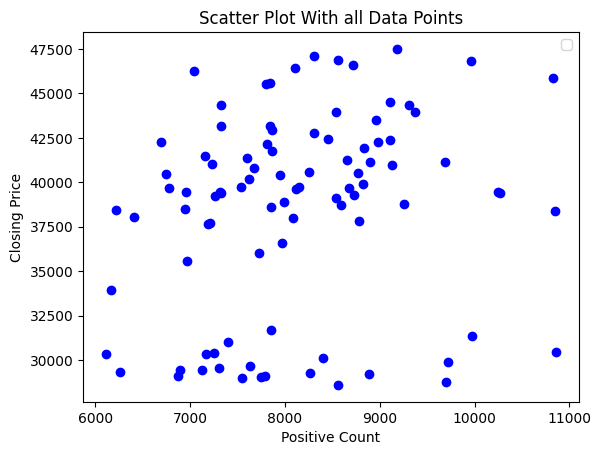

In [ ]:
plt.title('Scatter Plot With all Data Points')
plt.xlabel('Positive Count')
plt.ylabel('Closing Price')
plt.legend()

plt.scatter(gtdpc['xPos'], gtdpc['Close'], color='blue')

In [ ]:
FNSBitP = FNS(bit['Close'], 'bitcoin closing data')
population_mean = FNSBitP['mean']

# Calculate sample statistics
sample_mean = gtdpc['Close'].mean()
sample_std = gtdpc['Close'].std(ddof=1)  # Sample standard deviation
sample_size = len(gtdpc['Close'])
# Degrees of freedom
df_degrees = sample_size - 1

# Define the significance level (alpha)
alpha = 0.05

# Calculate t-value
t_value = (sample_mean - population_mean) / (sample_std / np.sqrt(sample_size))
t_value


40.65335545986851

T-value: 40.65335545986851
Critical value: 1.9863771544186173
Degrees of freedom: 91
Reject the null hypothesis.


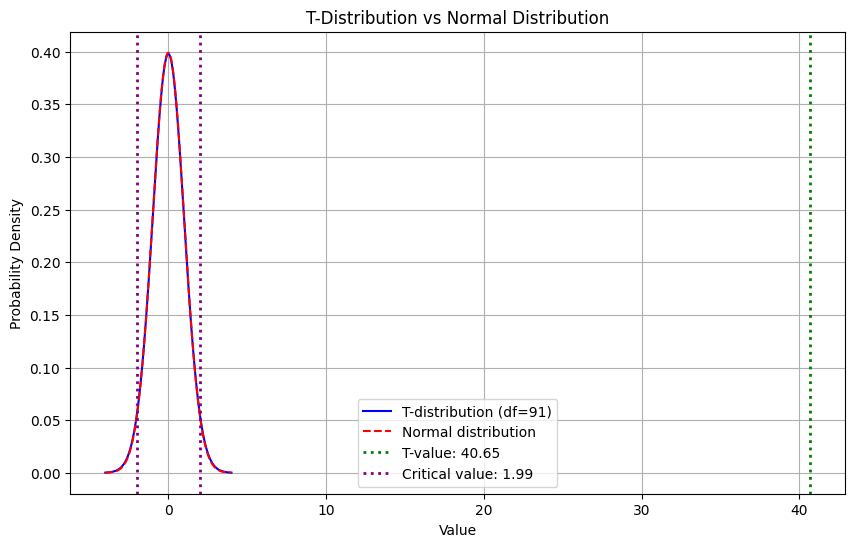

In [ ]:
# Calculate the critical value for a two-tailed test
critical_value = stats.t.ppf(1 - alpha / 2, df_degrees)

# Print the results
print(f"T-value: {t_value}")
print(f"Critical value: {critical_value}")
print(f"Degrees of freedom: {df_degrees}")

# Determine if the t-value is beyond the critical value (two-tailed test)
if abs(t_value) > critical_value:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

# Generate x values
x = np.linspace(-4, 4, 4000)

# Calculate t-distribution and normal distribution
t_dist = stats.t.pdf(x, df_degrees)
normal_dist = stats.norm.pdf(x)

# Plotting
plt.figure(figsize=(10, 6))

# T-distribution
plt.plot(x, t_dist, label=f'T-distribution (df={df_degrees})', color='blue')

# Normal distribution
plt.plot(x, normal_dist, label='Normal distribution', color='red', linestyle='dashed')

# Highlight the t-value
plt.axvline(t_value, color='green', linestyle='dotted', linewidth=2, label=f'T-value: {t_value:.2f}')

# Highlight the critical values
plt.axvline(critical_value, color='purple', linestyle='dotted', linewidth=2, label=f'Critical value: {critical_value:.2f}')
plt.axvline(-critical_value, color='purple', linestyle='dotted', linewidth=2)

# Titles and labels
plt.title('T-Distribution vs Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

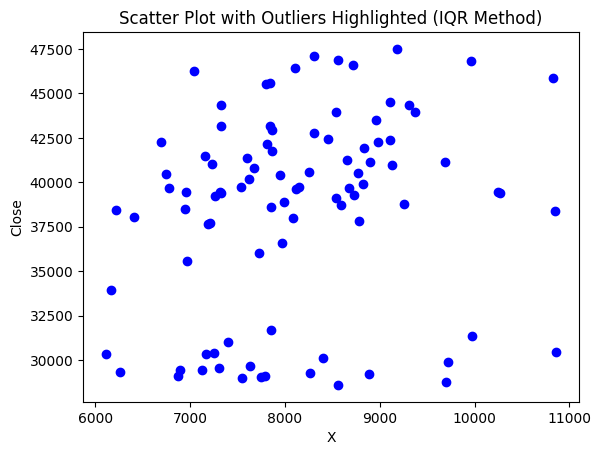

In [ ]:
def Outliers(gtdx, gtdy):
    Q1_x = FNS(gtdx, 'gtdx')['q1']
    Q3_x = FNS(gtdx, 'gtdx')['q3']
    IQR_x = Q3_x - Q1_x

    Q1_y = FNS(gtdy, 'gtdy')['q1']
    Q3_y = FNS(gtdy, 'gtdy')['q3']
    IQR_y = Q3_y - Q1_y

    outliers_iqr = gtdpc[
        (gtdx < (Q1_x - 1.5 * IQR_x)) | (gtdx > (Q3_x + 1.5 * IQR_x)) |
        (gtdy < (Q1_y - 1.5 * IQR_y)) | (gtdy > (Q3_y + 1.5 * IQR_y))
    ]


    # Scatter plot for normal points
    plt.scatter(gtdx, gtdy, color='blue', label='Normal Points')

    # Scatter plot for outliers detected by IQR method
    plt.scatter(outliers_iqr['xPos'], outliers_iqr['Close'], color='red', marker='o', label='Outliers')

    # Titles and labels
    plt.title('Scatter Plot with Outliers Highlighted (IQR Method)')
    plt.xlabel('X')
    plt.ylabel('Close')
Outliers(gtdpc['xPos'],gtdpc['Close'])

In [ ]:
# Function to remove outliers using IQR method
#need to find line of best fit
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
#first wave
df_no_outliers_xPos = remove_outliers_iqr(gtdpc, 'xPos')
df_no_outliers_Close = remove_outliers_iqr(df_no_outliers_xPos, 'Close')
#second wave
df_no_outliers_xPosTwo = remove_outliers_iqr(df_no_outliers_Close, 'xPos')
df_no_outliers_CloseTwo = remove_outliers_iqr(df_no_outliers_xPosTwo, 'Close')
#third wave
df_no_outliers_xPosThree = remove_outliers_iqr(df_no_outliers_CloseTwo, 'xPos')
df_no_outliers_CloseThree = remove_outliers_iqr(df_no_outliers_xPosThree, 'Close')
#pd.set_option('display.max_rows', None)
#not a good investment


Intercept: 30073.71015804114
Slope: 1.0314364968033076
Intercept: 30073.71015804114
Slope: 1.0314364968033076
R-squared: 0.04008734035672479
Mean Squared Error (MSE): 29433751.136153158


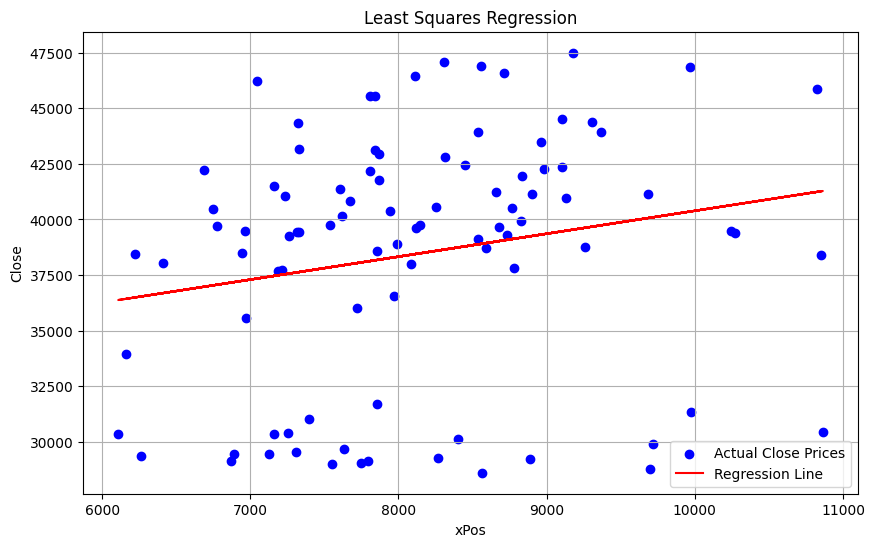

In [ ]:
X = gtdpc[['xPos']]  # Independent variable (predictor)
y = gtdpc['Close']  # Dependent variable (response)
# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients
intercept = model.intercept_
slope = model.coef_[0]

print(f"Intercept: {intercept}")
print(f"Slope: {slope}")

# Make predictions
gtdpc['Predicted_Close'] = model.predict(X)
r2 = r2_score(y, gtdpc['Predicted_Close'])
mse = mean_squared_error(y, gtdpc['Predicted_Close'])

print(f"Intercept: {intercept}")
print(f"Slope: {slope}")
print(f"R-squared: {r2}")
print(f"Mean Squared Error (MSE): {mse}")


# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot of the original data
plt.scatter(gtdpc['xPos'], gtdpc['Close'], color='blue', label='Actual Close Prices')

# Plot the regression line
plt.plot(gtdpc['xPos'], gtdpc['Predicted_Close'], color='red', label='Regression Line')

# Titles and labels
plt.title('Least Squares Regression')
plt.xlabel('xPos')
plt.ylabel('Close')
plt.legend()

# Show plot
plt.grid(True)
plt.show()
